# NoSQL (MongoDB) (sesión 3)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

A continuación unas comprobaciones iniciales.

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [2]:
import os
db_hostname = os.getenv('DB_HOSTNAME') or ("localhost" if RunningInCOLAB else "mongo")
if'vscode' in sys.modules or os.getenv('VSCODE_PID') is not None:
    db_hostname = "localhost"

In [3]:
!sudo apt-get update -qq

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
!sudo apt-get install -y -qq p7zip

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Instalación inicial de MongoDB (sólo necesaria en Google Colab)

In [5]:
if RunningInCOLAB:
  !wget -q https://raw.githubusercontent.com/dsevilla/bdge/refs/heads/24-25/addendum/mongo-utils/run-mongo-local.sh
  !bash run-mongo-local.sh

## Inicio de la hoja


In [6]:
%pip install --upgrade pymongo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [8]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [9]:
client = MongoClient(db_hostname, 27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [10]:
client.list_database_names()

['admin', 'config', 'local']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

### Descarga de todos los CSVs

In [11]:
!wget https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.001 -O - > es.stackoverflow.csv.7z
!wget https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.002 -O - >> es.stackoverflow.csv.7z

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-10-18 17:00:32--  https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.001
Resolviendo github.com... 140.82.121.3
Connecting to github.com|140.82.121.3|:443... conectado.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
No se pudo establecer la conexi�n SSL.
SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-10-18 17:00:32--  https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.002
Resolviendo github.com... 140.82.121.3
Connecting to github.com|140.82.121.3|:443... conectado.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
No se pudo establecer la conexi�n SSL.


In [12]:
!7zr x -aoa es.stackoverflow.csv.7z
!rm es.stackoverflow.csv.7z

"7zr" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Importación de los ficheros CSV y uso de Pymongo

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [13]:
!wget -q https://raw.githubusercontent.com/dsevilla/bdge/24-25/addendum/mongo-utils/csv_to_mongo.py

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc


In [15]:
from csv_to_mongo import csv_to_mongo
help(csv_to_mongo)

Help on function csv_to_mongo in module csv_to_mongo:

csv_to_mongo(file: str, coll: pymongo.synchronous.collection.Collection) -> None
    Carga un fichero CSV en Mongo. file especifica el fichero y coll la colección
    dentro de la base de datos.



Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [16]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

In [17]:
csv_to_mongo('Posts.csv',db.posts)

In [18]:
csv_to_mongo('Users.csv',db.users)

In [19]:
csv_to_mongo('Votes.csv',db.votes)

In [20]:
csv_to_mongo('Comments.csv',db.comments)

In [21]:
csv_to_mongo('Tags.csv',db.tags)

### El API de colección de MongoDB

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python

In [22]:
user=db.users.find_one()

In [23]:
user

{'_id': ObjectId('671278c10e27c77fce37ea89'),
 'Id': -1,
 'AboutMe': '<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas antiguas sin respuesta aproximadamente cada hora, para que atraigan algo de atención.</li><br/><li>Tener la propiedad de las preguntas y respuestas wiki para que nadie se lleve reputación por ellas</li><br/><li>Recibir la propiedad de los votos negativos en las publicaciones de spam o dañinas que son borradas permanentemente</li><br/><li>Tener la propiedad de las ediciones sugeridas por usuarios anónimos</li><br/><li><a href="http://meta.stackoverflow.com/a/92006">Quitar preguntas abandonadas</a></li><br/></ul><br/>',
 'AccountId': -1,
 'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'DisplayName': 'Comunidad',
 'DownVotes': 22504,
 'LastAccessDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'Lo

In [24]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

In [25]:
posts.count_documents({})

410346

In [26]:
post = posts.find_one()
post

{'_id': ObjectId('671278740e27c77fce31a79f'),
 'Id': 1,
 'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDeta

Utilizo la librería `pp` para imprimir los objetos grandes de una manera amigable.

In [27]:
users = db.users
pp(users.find_one())

{'AboutMe': '<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso '
            'que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas '
            'como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas '
            'antiguas sin respuesta aproximadamente cada hora, para que '
            'atraigan algo de atención.</li><br/><li>Tener la propiedad de las '
            'preguntas y respuestas wiki para que nadie se lleve reputación '
            'por ellas</li><br/><li>Recibir la propiedad de los votos '
            'negativos en las publicaciones de spam o dañinas que son borradas '
            'permanentemente</li><br/><li>Tener la propiedad de las ediciones '
            'sugeridas por usuarios anónimos</li><br/><li><a '
            'href="http://meta.stackoverflow.com/a/92006">Quitar preguntas '
            'abandonadas</a></li><br/></ul><br/>',
 'AccountId': -1,
 'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'DisplayName': 'C

A cada objeto se le asigna una clave implícita con nombre "`_id`" (si el objeto no lo incluye).

In [28]:
print (type(post['_id']))
post['_id']

<class 'bson.objectid.ObjectId'>


ObjectId('671278740e27c77fce31a79f')

La siguiente sintaxis está descatalogada en las nuevas versiones, pero era más conveniente:

In [29]:
#posts.save(post)

Ahora hay que hacerlo así (el resultado será 0 porque el documento no ha sido modificado desde que se leyó, pero sería 1 si el documento se modificó):

In [30]:
result = posts.replace_one({"_id": post['_id']}, post)
result.modified_count

0

In [31]:
post = posts.find_one()
pp(post)

{'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero '
         'añadir soporte para la negociación del tipo de contenido basado en '
         'extensiones en el <em>URI</em>, así que he añadido lo siguiente al '
         'código de inicialización del '
         'servicio:</p><br/><br/><pre><code>public static class '
         'WebApiConfig<br/>{<br/>  public static void '
         'Register(HttpConfiguration config)<br/>  {<br/>    '
         'config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", '
         '"application/json");<br/>    '
         'config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", '
         '"application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para '
         'que esto funcione necesito crear dos rutas para cada acción del '
         'controlador (estoy usando exclusivamente enrutamiento basado en '
         'atributos):</p><br/><br/><pre><code>[Route("item/{id}

In [32]:
for k,v in post.items():
    print("%s: %s" % (k,v))

_id: 671278740e27c77fce31a79f
Id: 1
AcceptedAnswerId: 2
AnswerCount: 1
Body: <p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDetails(int id)<br/>{<br/>  return i

Además de `find_one()`, la función principal de búsqueda es `find()`. Esta función ofrece un conjunto muy ámplio de opciones para búsqueda, que estudiaremos a continuación.

Primero, una consulta sencilla, con el valor de un campo:

In [33]:
posts.count_documents({'PostTypeId':2})

211615

También existe `explain()`, al estilo de SQL.

In [50]:
posts.find({"PostTypeId": 2}).explain()

{'explainVersion': '1',
 'queryPlanner': {'namespace': 'stackoverflow.posts',
  'indexFilterSet': False,
  'parsedQuery': {'PostTypeId': {'$eq': 2}},
  'queryHash': 'D71919F9',
  'planCacheKey': 'D71919F9',
  'maxIndexedOrSolutionsReached': False,
  'maxIndexedAndSolutionsReached': False,
  'maxScansToExplodeReached': False,
  'winningPlan': {'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'direction': 'forward'},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 211615,
  'executionTimeMillis': 501,
  'totalKeysExamined': 0,
  'totalDocsExamined': 410346,
  'executionStages': {'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'nReturned': 211615,
   'executionTimeMillisEstimate': 141,
   'works': 410347,
   'advanced': 211615,
   'needTime': 198731,
   'needYield': 0,
   'saveState': 410,
   'restoreState': 410,
   'isEOF': 1,
   'direction': 'forward',
   'docsExamined': 410346},
  'allPlansExecution': []},
 'command'

También se puede limitar la búsqueda.

In [73]:
respuestas = posts.find({'PostTypeId': 2}).limit(10)

La respuesta no es un conjunto de elementos, sino un cursor que puede ir recorriéndose.

In [71]:
respuestas

In [74]:
# Los cursores son como iteradores. 
# Por lo que si le pedimos next, nos 
# proporcionará la siguiente consulta generada
for document in respuestas:
    print(document)

{'_id': ObjectId('671278740e27c77fce31a7a0'), 'Id': 2, 'AcceptedAnswerId': '', 'AnswerCount': '', 'Body': '<p>He encontrado la solución.</p><br/><br/><p>Resulta que las rutas tienen asignada una <strong>precedencia</strong> numérica asignada, que el motor de enrutamiento de WebApi usa para decidir qué ruta usar en caso de conflicto. Las rutas creadas automáticamente para una misma acción siempre tienen una precedencia distinta, ¡pero la ruta que yo estaba creando manualmente tenía la misma precedencia que la ya existente!</p><br/><br/><p>Así pues la solución es añadir lo siguiente a <code>GetActionDirectRoutes</code>, inmediatamente después de <code>new RouteEntry</code>:</p><br/><br/><pre><code>entry.Route.DataTokens["precedence"] = <br/>    ((decimal)route.Route.DataTokens["precedence"]) - 0.1M;<br/></code></pre><br/>', 'ClosedDate': None, 'CommentCount': 2, 'CommunityOwnedDate': None, 'ContentLicense': 'CC BY-SA 3.0', 'CreationDate': datetime.datetime(2015, 10, 29, 19, 14, 23, 67300

In [78]:
respuestas = posts.find({'PostTypeId': 2}).limit(10)
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a7a0'),
  'Id': 2,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<p>He encontrado la solución.</p><br/><br/><p>Resulta que las rutas tienen asignada una <strong>precedencia</strong> numérica asignada, que el motor de enrutamiento de WebApi usa para decidir qué ruta usar en caso de conflicto. Las rutas creadas automáticamente para una misma acción siempre tienen una precedencia distinta, ¡pero la ruta que yo estaba creando manualmente tenía la misma precedencia que la ya existente!</p><br/><br/><p>Así pues la solución es añadir lo siguiente a <code>GetActionDirectRoutes</code>, inmediatamente después de <code>new RouteEntry</code>:</p><br/><br/><pre><code>entry.Route.DataTokens["precedence"] = <br/>    ((decimal)route.Route.DataTokens["precedence"]) - 0.1M;<br/></code></pre><br/>',
  'ClosedDate': None,
  'CommentCount': 2,
  'CommunityOwnedDate': None,
  'ContentLicense': 'CC BY-SA 3.0',
  'CreationDate': datetime.datetime(2015, 10, 29

También se puede importar en un dataframe de pandas:

<Axes: >

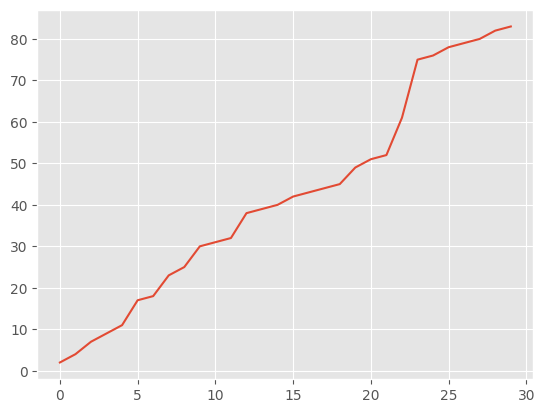

In [80]:
respuestas = posts.find({"PostTypeId": 2}).limit(30)
df = pd.DataFrame(respuestas)
df['Id'].plot()

La función `find()` tiene un gran número de posibilidades para especificar la búsqueda. Se pueden utilizar cualificadores complejos como:

- `$and`
- `$or`
- `$not`

Estos calificadores unen "objetos", no valores. Por otro lado, hay otros calificadores que se refieren a valores:

- `$lt` (menor)
- `$lte` (menor o igual)
- `$gt` (mayor)
- `$gte` (mayor o igual)

In [86]:
respuestas = posts.find(
    {
        '$and': [ 
                    {"PostTypeId": 2} ,
                    {"Id": {'$gte': 100}} 
                ]
    }
).limit(10)
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a7ed'),
  'Id': 102,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<pre><code>$ git reset --soft HEAD~  o $ git reset --soft HEAD~1       #1<br/>// Cambios necesarios //                                    #2<br/>$ git add ...                                               #3<br/>$ git commit ...                                            #4<br/></code></pre><br/><br/><p>Simplemente haces un reset soft, con lo que te quedas con los cambios en local pero deshaces el commit, después haces lo que quieras y vuelves a hacer el commit como querías la primera vez.</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'ContentLicense': 'CC BY-SA 3.0',
  'CreationDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'FavoriteCount': '',
  'LastActivityDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'LastEditDate': None,
  'LastEditorDisplayName': '',
  'LastEditorUserId': '',
  'OwnerDisplayName':

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)

In [40]:
db.posts.distinct('Score')

[-28,
 -14,
 -12,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 68,
 70,
 71,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 88,
 89,
 90,
 91,
 93,
 94,
 101,
 106,
 107,
 108,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 124,
 141,
 173,
 176,
 195,
 206,
 219,
 232]

## Framework de Agregación

Framework de agregación: https://docs.mongodb.com/manual/reference/operator/aggregation/. Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/. A continuación otro vídeo interseante:

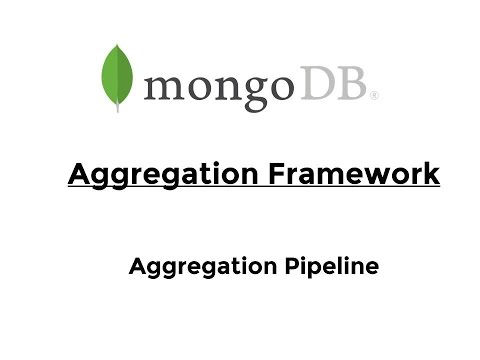

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [42]:
respuestas = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a79f'), 'Id': 1},
 {'_id': ObjectId('671278740e27c77fce31a7a0'), 'Id': 2},
 {'_id': ObjectId('671278740e27c77fce31a7a1'), 'Id': 3},
 {'_id': ObjectId('671278740e27c77fce31a7a2'), 'Id': 4},
 {'_id': ObjectId('671278740e27c77fce31a7a3'), 'Id': 5},
 {'_id': ObjectId('671278740e27c77fce31a7a4'), 'Id': 6},
 {'_id': ObjectId('671278740e27c77fce31a7a5'), 'Id': 7},
 {'_id': ObjectId('671278740e27c77fce31a7a6'), 'Id': 8},
 {'_id': ObjectId('671278740e27c77fce31a7a7'), 'Id': 9},
 {'_id': ObjectId('671278740e27c77fce31a7a8'), 'Id': 10},
 {'_id': ObjectId('671278740e27c77fce31a7a9'), 'Id': 11},
 {'_id': ObjectId('671278740e27c77fce31a7aa'), 'Id': 12},
 {'_id': ObjectId('671278740e27c77fce31a7ab'), 'Id': 14},
 {'_id': ObjectId('671278740e27c77fce31a7ac'), 'Id': 15},
 {'_id': ObjectId('671278740e27c77fce31a7ad'), 'Id': 16},
 {'_id': ObjectId('671278740e27c77fce31a7ae'), 'Id': 17},
 {'_id': ObjectId('671278740e27c77fce31a7af'), 'Id': 18},
 {'_id': ObjectId('6712

_Lookup_!

In [43]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        {'$limit': 20}
        ])
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a79f'),
  'Id': 1,
  'AcceptedAnswerId': 2,
  'AnswerCount': 1,
  'Body': '<p>Estoy creando un servicio usando <em>ASP.NET WebApi</em>. Quiero añadir soporte para la negociación del tipo de contenido basado en extensiones en el <em>URI</em>, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetIte

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [44]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' :
        {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName'  : True
        }},
        {'$limit': 20}
        ])
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a79f'),
  'Id': 1,
  'Score': 40,
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'_id': ObjectId('671278740e27c77fce31a7bc'),
  'Id': 33,
  'Score': 79,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7bf'),
  'Id': 36,
  'Score': 141,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7c1'),
  'Id': 38,
  'Score': 44,
  'owner': [{'DisplayName': 'Carlos Muñoz'}],
  'username': 'Carlos Muñoz'},
 {'_id': ObjectId('671278740e27c77fce31a7c3'),
  'Id': 40,
  'Score': 206,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7c6'),
  'Id': 43,
  'Score': 41,
  'owner': [{'DisplayName': 'Angel Angel'}],
  'username': 'Angel Angel'},
 {'_id': ObjectId('671278740e27c77fce31a7e2'),
  'Id': 90,
  'Score': 91,
  'owner': [{'DisplayName': 'Mosty Mostacho'}

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [45]:
respuestas = db.posts.aggregate( [
        { '$match': { 'Score' : {'$gte': 40}}},
        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$unwind': '$owner'},
        { '$project' :
         {
             'Id' : True,
             'Score': True,
             'username': '$owner.DisplayName'
         }
        },
        { '$limit' : 20 }
        ])
list(respuestas)

[{'_id': ObjectId('671278740e27c77fce31a79f'),
  'Id': 1,
  'Score': 40,
  'username': 'Konamiman'},
 {'_id': ObjectId('671278740e27c77fce31a7bc'),
  'Id': 33,
  'Score': 79,
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7bf'),
  'Id': 36,
  'Score': 141,
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7c1'),
  'Id': 38,
  'Score': 44,
  'username': 'Carlos Muñoz'},
 {'_id': ObjectId('671278740e27c77fce31a7c3'),
  'Id': 40,
  'Score': 206,
  'username': 'jachguate'},
 {'_id': ObjectId('671278740e27c77fce31a7c6'),
  'Id': 43,
  'Score': 41,
  'username': 'Angel Angel'},
 {'_id': ObjectId('671278740e27c77fce31a7e2'),
  'Id': 90,
  'Score': 91,
  'username': 'Mosty Mostacho'},
 {'_id': ObjectId('671278740e27c77fce31a7e6'),
  'Id': 94,
  'Score': 107,
  'username': 'Jcl'},
 {'_id': ObjectId('671278740e27c77fce31a7ee'),
  'Id': 103,
  'Score': 46,
  'username': 'Mosty Mostacho'},
 {'_id': ObjectId('671278740e27c77fce31a814'),
  'Id': 142,
  'Score':

Se pueden crear más índices, de tipos `ASCENDING`, `DESCENDING`, `HASHED`, y otros geoespaciales. https://api.mongodb.com/python/current/api/pymongo/collection.html#pymongo.collection.Collection.create_index

In [46]:
posts.create_index([('Id', pymongo.HASHED)])

'Id_hashed'

## EJERCICIO: Separar en dos colecciones las preguntas de las respuestas

## EJERCICIO: Con Agregación, mostrar las consulta RQ1 de la sesión 2